In [1]:
from robust_motifs.timing import Timer
from robust_motifs.data import save_count_er_graph, save_count_graph_from_matrix, import_connectivity_matrix
from pathlib import Path

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm

## Timing simple counting of extended simplices (no save)

### ER Number of nodes

In [5]:
ns_nodes = np.arange(3000,20001,1000)
results = []
for n_nodes in np.arange(3000,20001,1000):
    path = Path("data/timing/n_nodes/ER_"+str(n_nodes)+'.flag')
    path.parent.mkdir(exist_ok=True, parents=True)
    save_count_er_graph(path, n_nodes, density = 0.0077)
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000)
    results.append((np.mean(time), np.std(time)))

100%|██████████| 3000/3000 [00:00<00:00, 2744963.35it/s]
69467it [00:00, 639153.33it/s]
100%|██████████| 4000/4000 [00:00<00:00, 3248879.94it/s]
122892it [00:00, 647339.99it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3189099.76it/s]
192733it [00:00, 630152.30it/s]
100%|██████████| 6000/6000 [00:00<00:00, 3154798.04it/s]
277999it [00:00, 659649.89it/s]
100%|██████████| 7000/7000 [00:00<00:00, 3405652.24it/s]
377028it [00:00, 641043.38it/s]
100%|██████████| 8000/8000 [00:00<00:00, 212236.84it/s]
492889it [00:00, 656530.42it/s]
100%|██████████| 9000/9000 [00:00<00:00, 3417102.92it/s]
624691it [00:00, 668237.35it/s]
100%|██████████| 10000/10000 [00:00<00:00, 3337553.91it/s]
771770it [00:01, 665800.74it/s]
100%|██████████| 11000/11000 [00:00<00:00, 3460646.86it/s]
931734it [00:01, 669915.18it/s]
100%|██████████| 12000/12000 [00:00<00:00, 3294387.22it/s]
1110688it [00:01, 664598.90it/s]
100%|██████████| 13000/13000 [00:00<00:00, 3366007.28it/s]
1302029it [00:01, 662549.75it/s]
100%|████████

Text(0, 0.5, 'Seconds/1000 simplices')

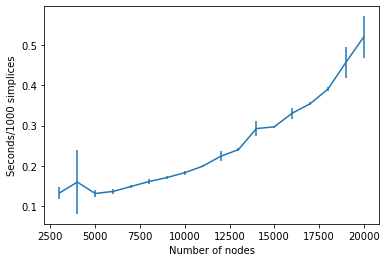

In [6]:
fig = plt.figure()
plt.errorbar(ns_nodes, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Number of nodes")
plt.ylabel("Seconds/1000 simplices")

In [7]:
fig.savefig("images/es-signature-nodes", transparent = False, facecolor = 'w')

### ER Density

In [8]:
densities = np.arange(0.001, 0.015, 0.001)
results = []
for density in densities:
    path = Path("data/timing/density/ER_"+str(n_nodes)+'.flag')
    path.parent.mkdir(exist_ok=True, parents=True)
    save_count_er_graph(path, 5000, density)
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000)
    results.append((np.mean(time), np.std(time)))

100%|██████████| 5000/5000 [00:00<00:00, 2589076.54it/s]
25157it [00:00, 511963.09it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2689345.99it/s]
50305it [00:00, 622907.85it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2997215.95it/s]
75005it [00:00, 644375.47it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2740658.65it/s]
100376it [00:00, 634969.23it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2710899.69it/s]
124936it [00:00, 640070.80it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2441671.91it/s]
149332it [00:00, 634444.39it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3066908.45it/s]
175175it [00:00, 642783.77it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3152663.86it/s]
199419it [00:00, 636592.93it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3110117.16it/s]
225882it [00:00, 636203.54it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3132883.18it/s]
249655it [00:00, 645046.79it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3089499.12it/s]
275213it [00:00, 615316.50it/s]
100%|██████████| 5000/50

Text(0, 0.5, 'Seconds/1000 simplices')

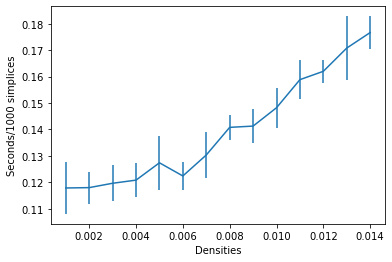

In [9]:
fig = plt.figure()
plt.errorbar(densities, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Densities")
plt.ylabel("Seconds/1000 simplices")

In [10]:
fig.savefig("images/es-signatures-densities", transparent = False, facecolor = 'w')

### Column n_simplices

In [11]:
n_simplices = np.arange(1000, 15001, 1000)
results = []
memories = []
for n in tqdm(n_simplices):
    path = Path("data/timing/column/column.flag")
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = n, n_iterations = 5)
    results.append((np.mean(time), np.std(time)))
    memories.append((np.mean(memory), np.std(memory)))

100%|██████████| 15/15 [22:01<00:00, 88.08s/it] 


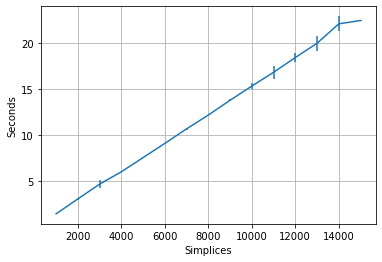

In [12]:
fig = plt.figure()
plt.errorbar(n_simplices, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Simplices")
plt.ylabel("Seconds")
plt.grid()

In [13]:
fig.savefig("images/es-signatures-simplices", transparent = False, facecolor = 'w')

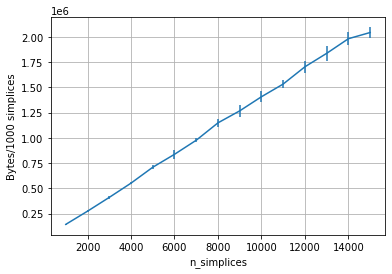

In [14]:
fig = plt.figure()
plt.errorbar(n_simplices, [result[0] for result in memories], yerr = [result[1] for result in memories])
plt.xlabel("n_simplices")
plt.ylabel("Bytes")
plt.grid()

In [15]:
fig.savefig("images/es-signature-simplices-memory", transparent = False, facecolor = 'w')

### Column dimension

In [16]:
dimension = range(1,6)
results = []
memories = []
for n in tqdm(dimension):
    path = Path("data/timing/column/column.flag")
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000, dimension=n)
    results.append((np.mean(time), np.std(time)))
    memories.append((np.mean(memory), np.std(memory)))

100%|██████████| 5/5 [02:39<00:00, 32.00s/it]


Text(0, 0.5, 'Seconds/1000 simplices')

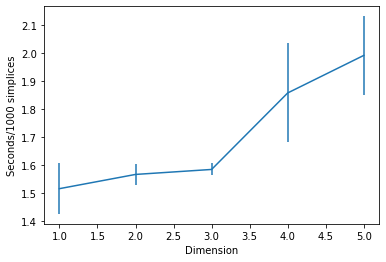

In [17]:
fig = plt.figure()
plt.errorbar(dimension, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Dimension")
plt.ylabel("Seconds/1000 simplices")

In [18]:
fig.savefig("images/es-signature-dimension", transparent = False, facecolor = 'w')

Text(0, 0.5, 'Bytes/1000 simplices')

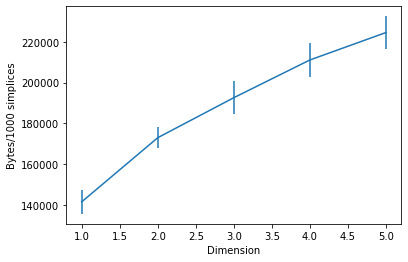

In [19]:
fig = plt.figure()
plt.errorbar(dimension, [result[0] for result in memories], yerr = [result[1] for result in memories])
plt.xlabel("Dimension")
plt.ylabel("Bytes/1000 simplices")

In [20]:
fig.savefig("images/es-signature-dimension-memory", transparent = False, facecolor = 'w')